**Logistic Regression**

In [77]:
import pandas as pd
import numpy as np

In [78]:
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Loading the Dataset

In [79]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [81]:
df[df.isnull().any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [82]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [83]:
df.drop(["embarked", "alive", "class"], axis = 1, inplace=True)

In [84]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True


**Exploratory Data Analysis(EDA)**

In [85]:
null_num = []
for i in df.columns:
    x = df[i]. isnull().sum()
    null_num.append(x)

In [86]:
null_num

[0, 0, 0, 177, 0, 0, 0, 0, 0, 688, 2, 0]

In [87]:
pd.DataFrame(null_num, index=df.columns, columns=["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


<Axes: xlabel='deck', ylabel='count'>

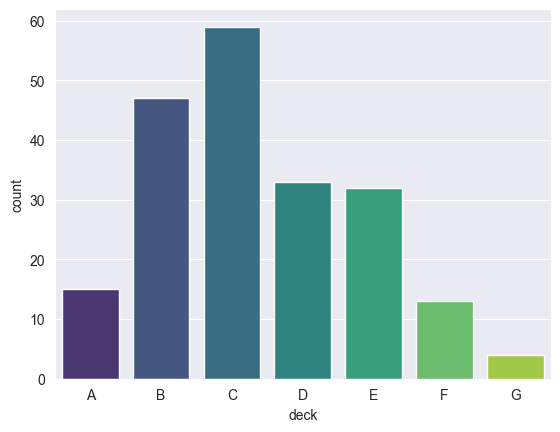

In [88]:
sns.set_style("darkgrid")
sns.countplot(x="deck", data=df, palette="viridis")

<Axes: xlabel='deck', ylabel='count'>

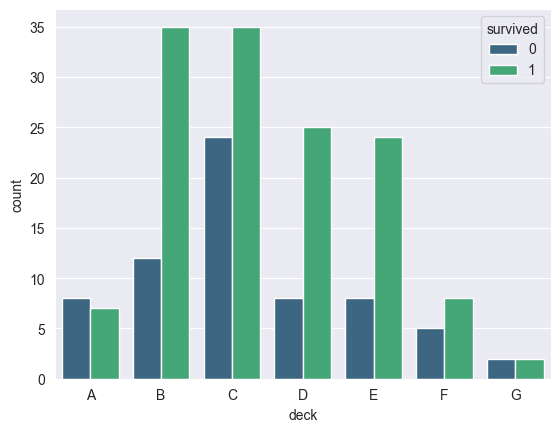

In [89]:
sns.set_style("darkgrid")
sns.countplot(x="deck", hue="survived", data=df, palette="viridis")

In [90]:
df.drop(["deck"], axis=1, inplace=True)

In [91]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


<Axes: xlabel='pclass', ylabel='age'>

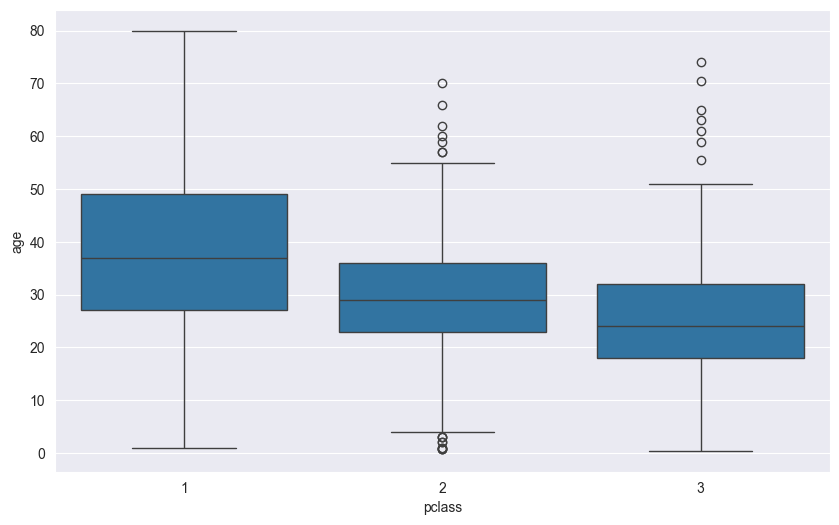

In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = "pclass", y = "age", data = df)

In [93]:
# filling the missing values in the age column
def fillna_age(columns):
    age = columns[0]
    pclass = columns[1]
    
    if(pd.isnull(age)):
        if(pclass == 1):
            return 38
        elif(pclass == 2):
            return 29
        else:
            return 23
    else:
        return age

In [94]:
# all the missing values in the age are filled with value defind int the function
df.age = df[["age", "pclass", ]].apply(fillna_age, axis = 1)

In [95]:
# checking the table:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)
    
pd.DataFrame(null_num, index=df.columns, columns= ["Total Missing values"])

,Total Missing values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,2


In [96]:
df.dropna(inplace=True)

In [97]:
# checking the table:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)
    
pd.DataFrame(null_num, index=df.columns, columns= ["Total Missing values"])

,Total Missing values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,0


<Axes: xlabel='survived', ylabel='count'>

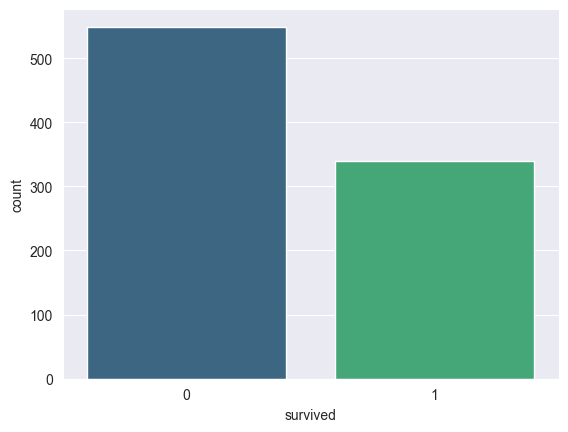

In [98]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", palette="viridis", data=df)

In [99]:
df.survived.value_counts()

survived
0    549
1    340
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

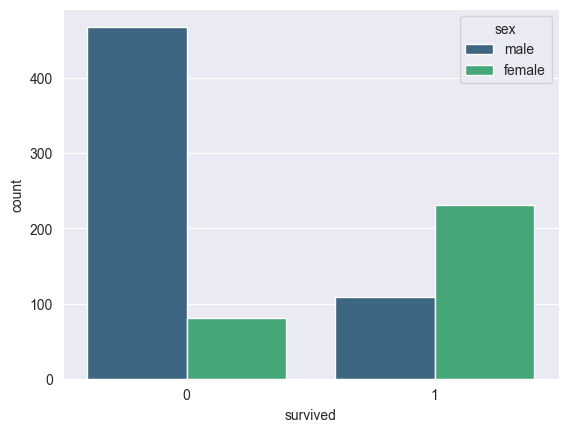

In [100]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue="sex", palette="viridis", data=df)

<Axes: xlabel='survived', ylabel='count'>

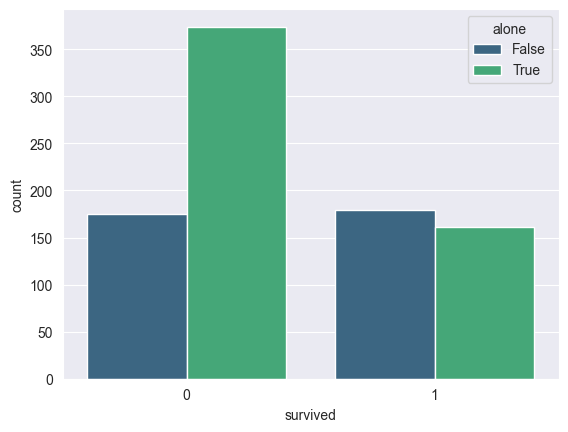

In [101]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue = "alone", data=df, palette= "viridis")

<Axes: xlabel='survived', ylabel='count'>

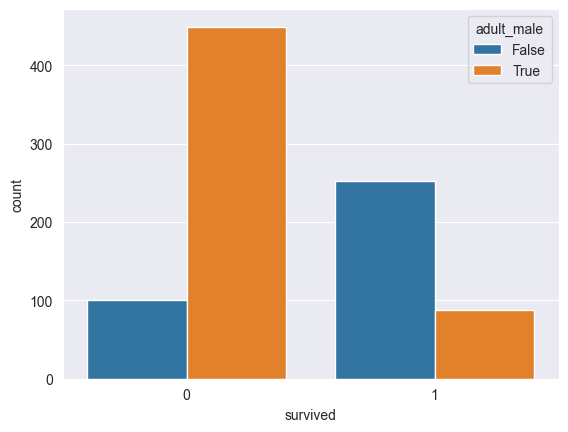

In [102]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "adult_male", data=df)

<Axes: xlabel='survived', ylabel='count'>

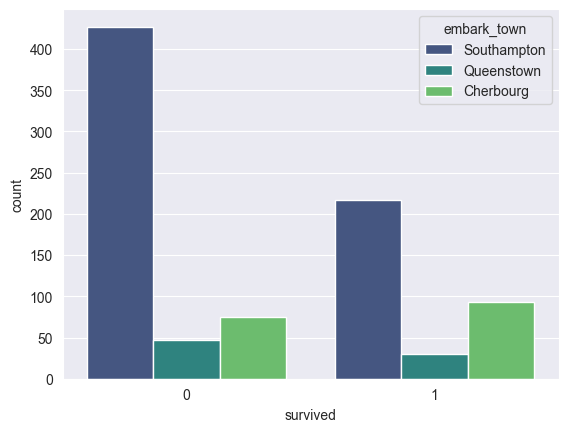

In [103]:
sns.countplot(x = "survived", hue="embark_town", palette="viridis", data=df)

In [104]:
df.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

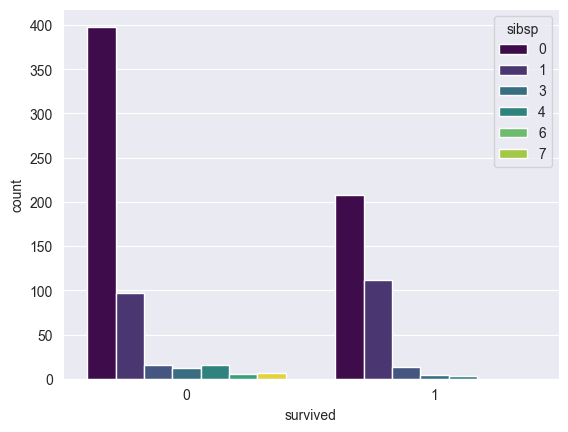

In [105]:
sns.countplot(x="survived", hue="sibsp", palette="viridis", data=df)

<Axes: xlabel='age', ylabel='Density'>

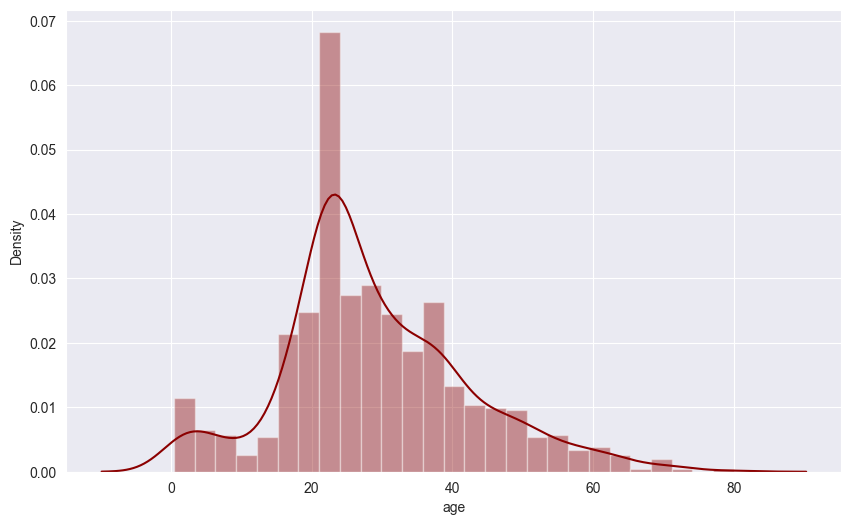

In [106]:
plt.figure(figsize=(10,6))
sns.distplot(df["age"], color= "darkred")

<Axes: xlabel='fare', ylabel='Density'>

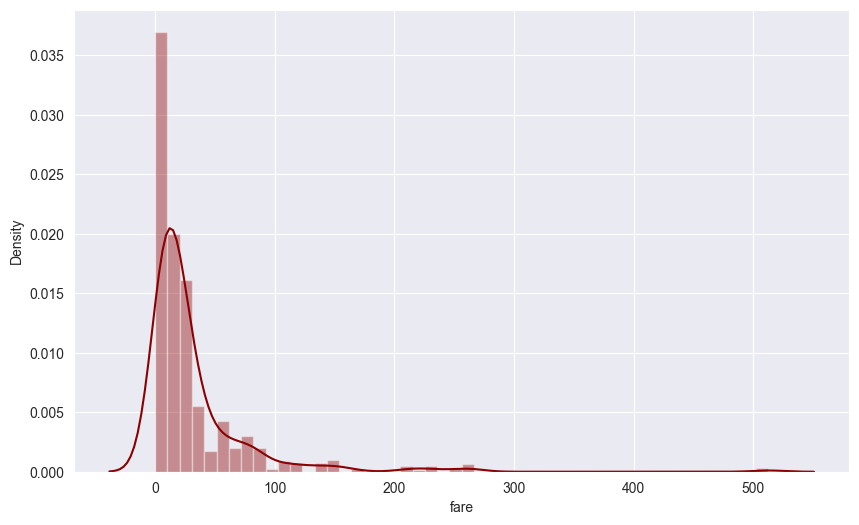

In [107]:
plt.figure(figsize=(10,6))
sns.distplot(df["fare"], color= "darkred")

In [108]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


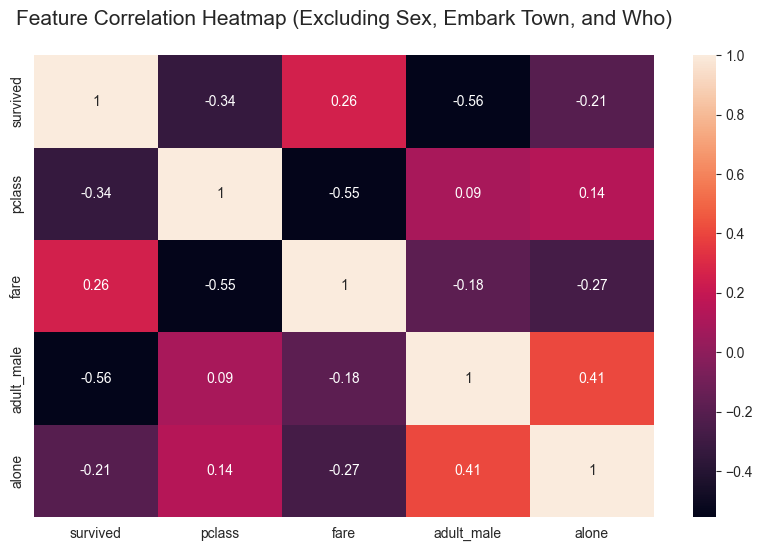

In [121]:

# Exclude 'sex', 'embark_town', and 'who' columns
columns_to_exclude = ['sex', 'who'] + [col for col in df.columns if col.startswith('embark_town')]
df_corr = df.drop(columns=columns_to_exclude)

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Create a heatmap to visualize the correlation matrix with a specific figure size
plt.figure(figsize=(10, 6))  # Adjusting the figure size as per your requirement
sns.heatmap(corr_matrix, annot=True)

#set the title for the heatmap
plt.title('Feature Correlation Heatmap (Excluding Sex, Embark Town, and Who)\n', fontsize=15)
plt.show()



In [114]:
df.drop(["age", "parch", "sibsp"], axis=1, inplace=True)

In [115]:
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone
0,0,3,male,7.2500,man,True,Southampton,False
1,1,1,female,71.2833,woman,False,Cherbourg,False
2,1,3,female,7.9250,woman,False,Southampton,True
3,1,1,female,53.1000,woman,False,Southampton,False
4,0,3,male,8.0500,man,True,Southampton,True


In [122]:
sex = pd.get_dummies(df["sex"], drop_first=True)
who = pd.get_dummies(df["who"], drop_first=True)
adult_male = pd.get_dummies(df["adult_male"], drop_first=True)
embark_town = pd.get_dummies(df["embark_town"], drop_first=True)
alone = pd.get_dummies(df["alone"], drop_first=True)

In [123]:
df = pd.concat([df, sex, who, adult_male, embark_town,  alone], axis = 1)

In [124]:
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone,male,man,woman,True,Queenstown,Southampton,True
0,0,3,male,7.2500,man,True,Southampton,False,True,True,False,True,False,True,False
1,1,1,female,71.2833,woman,False,Cherbourg,False,False,False,True,False,False,False,False
2,1,3,female,7.9250,woman,False,Southampton,True,False,False,True,False,False,True,True
3,1,1,female,53.1000,woman,False,Southampton,False,False,False,True,False,False,True,False
4,0,3,male,8.0500,man,True,Southampton,True,True,True,False,True,False,True,True


In [125]:
df.drop(["sex", "who", "adult_male","embark_town", "alone"], axis = 1)

,survived,pclass,fare,male,man,woman,True,Queenstown,Southampton,True
0,0,3,7.2500,True,True,False,True,False,True,False
1,1,1,71.2833,False,False,True,False,False,False,False
2,1,3,7.9250,False,False,True,False,False,True,True
3,1,1,53.1000,False,False,True,False,False,True,False
4,0,3,8.0500,True,True,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,13.0000,True,True,False,True,False,True,True
887,1,1,30.0000,False,False,True,False,False,True,True
888,0,3,23.4500,False,False,True,False,False,True,False
889,1,1,30.0000,True,True,False,True,False,False,True


In [126]:
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone,male,man,woman,True,Queenstown,Southampton,True
0,0,3,male,7.2500,man,True,Southampton,False,True,True,False,True,False,True,False
1,1,1,female,71.2833,woman,False,Cherbourg,False,False,False,True,False,False,False,False
2,1,3,female,7.9250,woman,False,Southampton,True,False,False,True,False,False,True,True
3,1,1,female,53.1000,woman,False,Southampton,False,False,False,True,False,False,True,False
4,0,3,male,8.0500,man,True,Southampton,True,True,True,False,True,False,True,True
